In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # to print multiple outputs from the same cell
import math
import utils
import pandas as pd
from datetime import datetime, timedelta, date

### Let's load the merged dataframe

In [2]:
merged_df = pd.read_csv('dataset/merged_dataset_cleaned.csv', lineterminator='\n')
merged_df

,user_id,name,lang,bot,account_created,statuses_count,tweet_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created,text
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,486718663223828480,0,0,0,0,0,1,2019-07-11 03:49:06,"@4fri2endly0 ""A business that makes nothing bu..."
1,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,479535357126393856,0,0,0,0,0,0,2019-06-21 08:05:13,"""Happiness is not a station you arrive at, but..."
2,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,451700895491706880,0,0,0,0,0,0,2019-04-05 12:41:00,Music flow.
3,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,491920040405397504,0,0,0,0,0,1,2019-07-25 12:17:31,@_SimplyKC follow meeee...
4,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,460522543628046336,0,0,0,0,0,0,2019-04-29 20:55:05,"""You are the only person on earth who can use ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194229,225683965,Ronnie Streff,en,0,2015-12-14 05:34:41,68,459836424985268160,32,0,0,0,0,2,2019-04-27 23:28:41,RT @fwdcrocblu: @JoeNBC SPECIAL LITTLE PRESENT...
8194230,225683965,Ronnie Streff,en,0,2015-12-14 05:34:41,68,488436129050669056,0,0,0,0,0,1,2019-07-15 21:33:42,@gpracer350 try real numbers instead of wack-j...
8194231,225683965,Ronnie Streff,en,0,2015-12-14 05:34:41,68,428920127216566336,0,0,0,0,0,1,2019-02-01 15:58:21,"My @otterbox armor is tough, but it didn't pro..."
8194232,225683965,Ronnie Streff,en,0,2015-12-14 05:34:41,68,587888773733703680,0,0,0,0,0,1,2020-04-15 08:03:00,@erinmcunningham guess that make me especially...


### Filter tweets only of 2019

In [3]:
# Cast tweet creation to datetime
merged_df["tweet_created"] = pd.to_datetime(merged_df["tweet_created"], errors="coerce")

year = 2019

merged_df = merged_df[merged_df.tweet_created.dt.year == year]
merged_df

,user_id,name,lang,bot,account_created,statuses_count,tweet_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created,text
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,486718663223828480,0,0,0,0,0,1,2019-07-11 03:49:06,"@4fri2endly0 ""A business that makes nothing bu..."
1,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,479535357126393856,0,0,0,0,0,0,2019-06-21 08:05:13,"""Happiness is not a station you arrive at, but..."
2,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,451700895491706880,0,0,0,0,0,0,2019-04-05 12:41:00,Music flow.
3,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,491920040405397504,0,0,0,0,0,1,2019-07-25 12:17:31,@_SimplyKC follow meeee...
4,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,460522543628046336,0,0,0,0,0,0,2019-04-29 20:55:05,"""You are the only person on earth who can use ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194227,225683965,Ronnie Streff,en,0,2015-12-14 05:34:41,68,490707104215609280,0,0,0,0,0,1,2019-07-22 03:57:45,"@nicholeaileen Giant on H St locks their ""in"" ..."
8194228,225683965,Ronnie Streff,en,0,2015-12-14 05:34:41,68,421489558099070976,0,0,0,1,1,1,2019-01-12 03:51:56,All listings have that many errors? “@IMGoph: ...
8194229,225683965,Ronnie Streff,en,0,2015-12-14 05:34:41,68,459836424985268160,32,0,0,0,0,2,2019-04-27 23:28:41,RT @fwdcrocblu: @JoeNBC SPECIAL LITTLE PRESENT...
8194230,225683965,Ronnie Streff,en,0,2015-12-14 05:34:41,68,488436129050669056,0,0,0,0,0,1,2019-07-15 21:33:42,@gpracer350 try real numbers instead of wack-j...


As we can see there are ~= 5000000 tweets made in 2019 in the dataset

### Group by user, tweet creation in the same day and collapse the values (sum)

In [4]:
temp_df = merged_df.groupby(['user_id',merged_df['tweet_created'].dt.to_period('D')], as_index=False).sum(['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions'])
temp_df = temp_df[['user_id', 'bot', 'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']]
temp_df['AcceptanceScore'] = temp_df['retweet_count'] + temp_df['reply_count'] + temp_df['favorite_count']
temp_df['DiffusionScore'] = temp_df['num_hashtags'] + temp_df['num_urls'] + temp_df['num_mentions']
temp_df['SuccessScore'] = temp_df['AcceptanceScore']/ (temp_df['DiffusionScore'] + 0.1)
temp_df['bot'].mask(temp_df['bot']>0, 1, inplace=True)
temp_df = temp_df[['user_id', 'bot', 'SuccessScore']]


temp_tmp = merged_df.groupby(['user_id',merged_df['tweet_created'].dt.to_period('D')], as_index=False).size()
temp_df['tweet_created'] = temp_tmp['tweet_created'].astype(str)
temp_df['tweet_created'] = pd.to_datetime(temp_df['tweet_created'], errors='coerce')
final_df = temp_df
final_df

,user_id,bot,SuccessScore,tweet_created
0,887281,0,0.000000,2019-01-03
1,887281,0,1.803279,2019-02-14
2,887281,0,0.476190,2019-03-18
3,887281,0,0.243902,2019-05-23
4,887281,0,1.960784,2019-05-24
...,...,...,...,...
399033,2688868016,0,0.000000,2019-08-01
399034,2688868016,0,0.000000,2019-08-02
399035,2717999764,0,10.000000,2019-07-22
399036,2717999764,0,0.000000,2019-07-24


### Create a list of DataFrames. This represents the timeseries for each user. Add the missing days to each user

In [5]:
import numpy as np
users = temp_df.groupby('user_id', as_index=False)['bot'].sum()
users['bot'].mask(users['bot']>0, 1, inplace=True)
from tslearn.preprocessing import TimeSeriesResampler
scaler = TimeSeriesResampler(sz=365)  
USERS_TIMESSERIES_LIST = {}
start_date = date(2019, 1, 1)
end_date = date(2019, 12, 1)

for user in users.user_id:

    USERS_TIMESSERIES_LIST[user] = final_df[final_df.user_id == user][['SuccessScore', 'tweet_created']]
    
    new_date_range = pd.date_range(start="2019-01-01", end="2019-12-31", freq="D")
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].set_index('tweet_created')
    # USERS_TIMESSERIES_LIST[user] = pd.Series(USERS_TIMESSERIES_LIST[user].squeeze())
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].reindex(new_date_range, fill_value=-1)
    USERS_TIMESSERIES_LIST[user].index.name = 'day'
    USERS_TIMESSERIES_LIST[user].reset_index(inplace=True)
    USERS_TIMESSERIES_LIST[user].drop(columns='day', inplace=True)
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].SuccessScore
    USERS_TIMESSERIES_LIST[user] = ((USERS_TIMESSERIES_LIST[user] - USERS_TIMESSERIES_LIST[user].mean())/USERS_TIMESSERIES_LIST[user].std())
    USERS_TIMESSERIES_LIST[user] = scaler.fit_transform(USERS_TIMESSERIES_LIST[user].values.reshape(1, -1)).flatten()


In [6]:
import numpy as np
df = pd.DataFrame()
df['user_id'] = list(USERS_TIMESSERIES_LIST.keys())
df['dim_0'] = np.array(USERS_TIMESSERIES_LIST.values())
df = pd.merge(df, users, on = 'user_id')
df = df.drop(columns='user_id')
df

,dim_0,bot
0,"[-0.14485360704500155, -0.14485360704500155, 3...",0
1,"[-0.11760158500156498, -0.11760158500156498, 0...",0
2,"[-0.09923217074143285, -0.09923217074143285, 0...",0
3,"[-0.2370985004802542, -0.2370985004802542, -0....",0
4,"[-0.17425370245606298, -0.17425370245606298, -...",0
...,...,...
5157,"[-0.10511886288804873, -0.10511886288804873, -...",0
5158,"[-0.05450212053276507, -0.05450212053276507, -...",0
5159,"[-0.09060272696309188, -0.09060272696309188, -...",0
5160,"[-0.09090977893411815, -0.09090977893411815, -...",0


### Try classifying


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
my_df = df.copy()

y = my_df.pop('bot')
X = np.stack(my_df.dim_0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [12]:
import keras_tuner
import tensorflow as tf

class my_HyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        for i in range(1, hp.Choice("num_layers", [3, 4]) + 1):
            model.add(tf.keras.layers.Dense(
                hp.Choice(f"units_layer_{i}", [128, 256, 512]),
                activation='relu'
                )
            )
       
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        
        model.compile(
            optimizer=tf.keras.optimizers.SGD(
                learning_rate = hp.Choice('learning_rate', [0.01, 0.1]),
                momentum=0.0,
                nesterov=False,
                weight_decay=hp.Choice('weight_decay', [1e-2, 5e-2, 1e-1, 5e-1]),
                clipnorm=None,
                clipvalue=None,
                global_clipnorm=None,
                # use_ema=False,
                # ema_momentum=0.99,
                # ema_overwrite_frequency=None,
                # jit_compile=True,
                name="SGD"
            ), 
            loss="binary_crossentropy", 
            metrics=["accuracy"]
            )
        return model


    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            **kwargs,
            shuffle=True,
            epochs=hp.Choice("epochs",  [300]),
            batch_size=hp.Choice("batch_size",  [512]),
            verbose=0,  
            workers=10,
            use_multiprocessing=True
            )
        

tuner = keras_tuner.RandomSearch(
    hypermodel=my_HyperModel(),
    objective="val_accuracy",
    max_trials=200,
    executions_per_trial=1,
    overwrite=True,
    directory="./models/ts/keras_tuner",
    project_name="ts_classification",
)


tuner.search(X_train , y_train, validation_data=(X_test, y_test))
model = tuner.get_best_models()[0]

Trial 200 Complete [00h 00m 42s]
val_accuracy: 0.5945771336555481

Best val_accuracy So Far: 0.8495803475379944
Total elapsed time: 01h 31m 04s
INFO:tensorflow:Oracle triggered exit


In [13]:
from sklearn.metrics import classification_report
predicted_labels = (model.predict(X_test) > 0.5).astype("bool")
print(classification_report(y_test, 
                            predicted_labels, 
                            target_names=['Not Bot', 'Bot']))

49/49 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Not Bot       0.92      0.69      0.79       637
         Bot       0.82      0.96      0.88       912

    accuracy                           0.85      1549
   macro avg       0.87      0.83      0.84      1549
weighted avg       0.86      0.85      0.84      1549



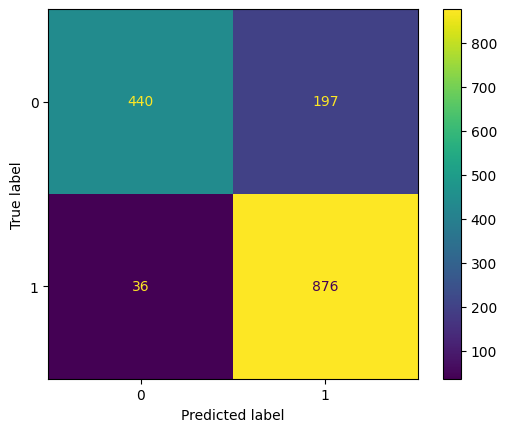

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [16]:
saved_filepath = "models/nn_model_time_series"
model.save(saved_filepath)

INFO:tensorflow:Assets written to: models/nn_model_time_series/assets


INFO:tensorflow:Assets written to: models/nn_model_time_series/assets
